In [204]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor, LassoCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_brain_tumor = pd.read_csv('BrainTumor.csv')

# Data study

In [4]:
display(df_brain_tumor)

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,49,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease,18.0,Parietal lobe,32
1996,1997,57,Male,Glioblastoma,IV,Occipital lobe,Surgery,Complete response,NaN,NaN,38
1997,1998,45,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response,20.0,Temporal lobe,44
1998,1999,62,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease,22.0,Frontal lobe,28


In [6]:
df_brain_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


In [16]:
df_brain_tumor.isna().sum()

Patient ID                       0
Age                              0
Gender                           0
Tumor Type                       0
Tumor Grade                      0
Tumor Location                   0
Treatment                        0
Treatment Outcome                0
Time to Recurrence (months)    562
Recurrence Site                562
Survival Time (months)           0
dtype: int64

In [11]:
np.unique(df_brain_tumor['Tumor Type'], return_counts=True)

(array(['Astrocytoma', 'Glioblastoma', 'Meningioma'], dtype=object),
 array([653, 637, 710], dtype=int64))

In [12]:
np.unique(df_brain_tumor['Tumor Grade'], return_counts=True)

(array(['I', 'II', 'III', 'IV'], dtype=object),
 array([710, 349, 306, 635], dtype=int64))

In [13]:
np.unique(df_brain_tumor['Tumor Location'], return_counts=True)

(array(['Frontal lobe', 'Occipital lobe', 'Parietal lobe', 'Temporal lobe'],
       dtype=object),
 array([515, 485, 503, 497], dtype=int64))

In [14]:
np.unique(df_brain_tumor['Treatment'], return_counts=True)

(array(['Chemotherapy', 'Chemotherapy + Radiation', 'Radiation', 'Surgery',
        'Surgery + Chemotherapy', 'Surgery + Radiation',
        'Surgery + Radiation therapy'], dtype=object),
 array([123,   2,  73, 139, 779, 882,   2], dtype=int64))

In [15]:
np.unique(df_brain_tumor['Treatment Outcome'], return_counts=True)

(array(['Complete response', 'Partial response', 'Progressive disease',
        'Stable disease'], dtype=object),
 array([561, 353, 582, 504], dtype=int64))

In [38]:
np.unique(df_brain_tumor['Recurrence Site'], return_counts=True)

(array(['Frontal lobe', 'Occipital lobe', 'Parietal lobe', 'Temporal lobe'],
       dtype=object),
 array([414, 276, 367, 381], dtype=int64))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

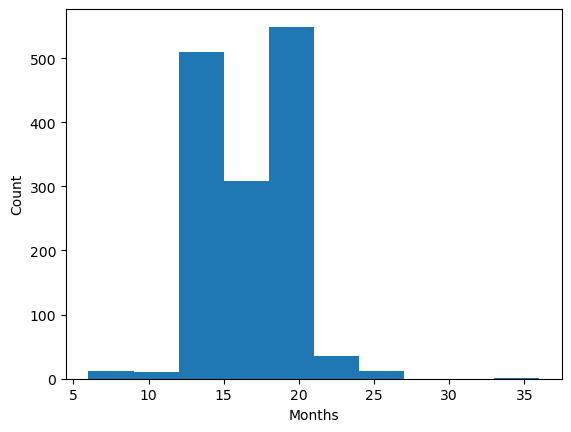

In [43]:

plt.figure()
plt.hist(df_brain_tumor['Time to Recurrence (months)'])
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

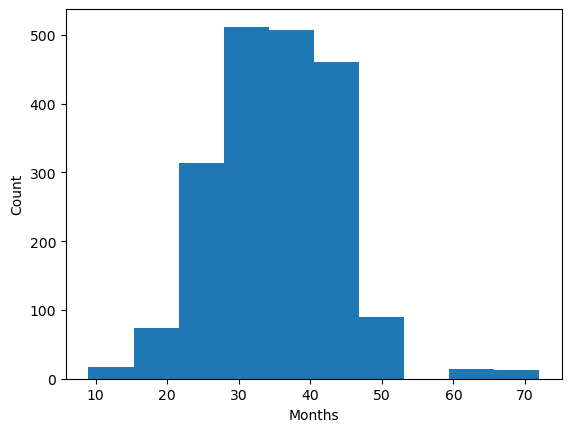

In [32]:
plt.figure()
plt.hist(df_brain_tumor['Survival Time (months)'])
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

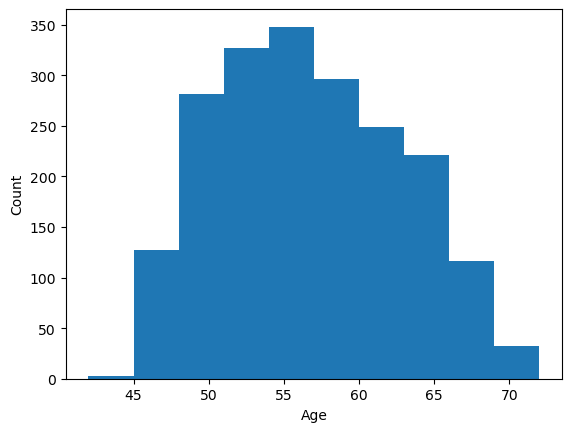

In [31]:
plt.figure()
plt.hist(df_brain_tumor['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

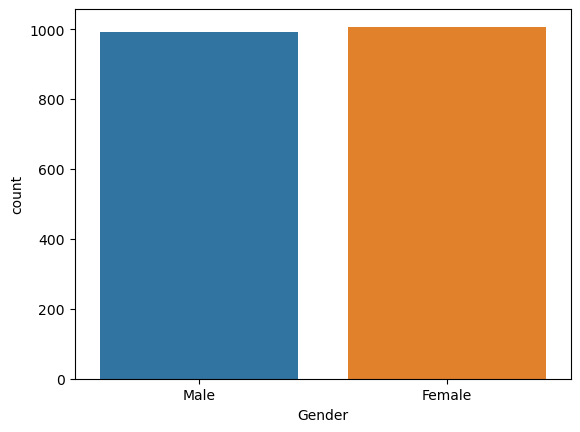

In [24]:
plt.figure()
sns.countplot(x = df_brain_tumor['Gender'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

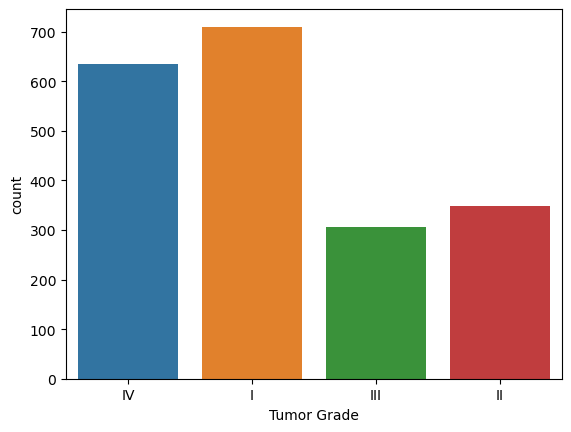

In [25]:
plt.figure()
sns.countplot(x = df_brain_tumor['Tumor Grade'])
plt.show()

# Data preprocessing

In [33]:
# Get rid of NaN values
df_brain_tumor.dropna(axis=0, inplace=True)

In [35]:
df_brain_tumor.isna().sum()

Patient ID                     0
Age                            0
Gender                         0
Tumor Type                     0
Tumor Grade                    0
Tumor Location                 0
Treatment                      0
Treatment Outcome              0
Time to Recurrence (months)    0
Recurrence Site                0
Survival Time (months)         0
dtype: int64

In [60]:
X_data

,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site
0,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe
2,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe
4,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe
5,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe
7,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe
...,...,...,...,...,...,...,...,...,...
1994,64,Male,Astrocytoma,III,Frontal lobe,Chemotherapy,Stable disease,14.0,Frontal lobe
1995,49,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease,18.0,Parietal lobe
1997,45,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response,20.0,Temporal lobe
1998,62,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease,22.0,Frontal lobe


In [34]:
# Split data into features and labels
X_data = df_brain_tumor.drop(['Patient ID','Survival Time (months)'], axis=1)
y_data = df_brain_tumor['Survival Time (months)']

In [61]:
# Transform categorical values into numerical form
ct = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[1,2,3,4,5,6,8])], remainder='passthrough')

In [62]:
X_data_one_hot = ct.fit_transform(X_data)

In [64]:
# Visualize transformation
pd.DataFrame(X_data_one_hot)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,10.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,60.0,14.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0,24.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,10.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,60.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,64.0,14.0
1434,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49.0,18.0
1435,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,20.0
1436,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,62.0,22.0


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_data_one_hot,
                                                    y_data,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.3)

In [174]:
X_train.shape, y_train.shape

((805, 30), (805,))

In [175]:
X_val.shape, y_val.shape

((345, 30), (345,))

In [176]:
X_test.shape, y_test.shape

((288, 30), (288,))

In [179]:
# Data standardization
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_val_ss = scaler.fit_transform(X_val)
X_test_ss = scaler.fit_transform(X_test)

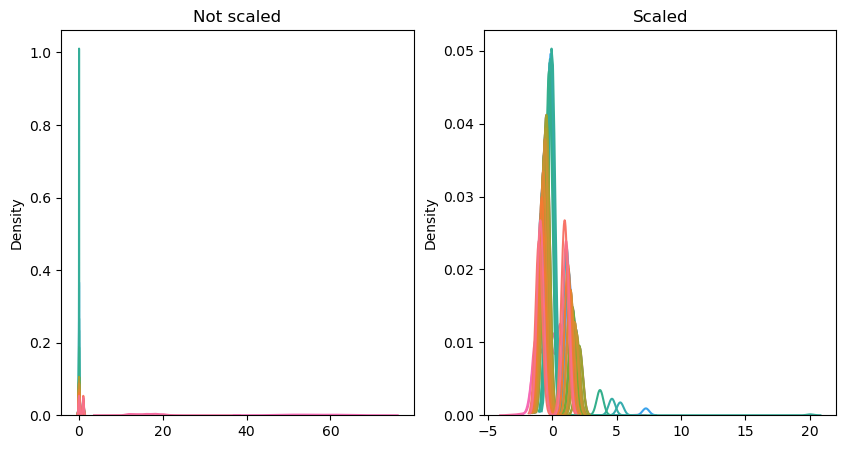

In [206]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Not scaled')
sns.kdeplot(X_train, legend=None)
plt.subplot(1,2,2)
plt.title('Scaled')
sns.kdeplot(X_train_ss, legend=None)
plt.show()

# Model training 

In [236]:
model_1 = Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

In [237]:
history_1 = model_1.fit(X_train_ss,
            y_train,
            epochs=200,
            validation_data=(X_val_ss,y_val),
            verbose=0)

# Evaluate the model

In [238]:
model_1.evaluate(X_test_ss, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 2.5379 - mae: 2.5379


[2.4453177452087402, 2.4453177452087402]

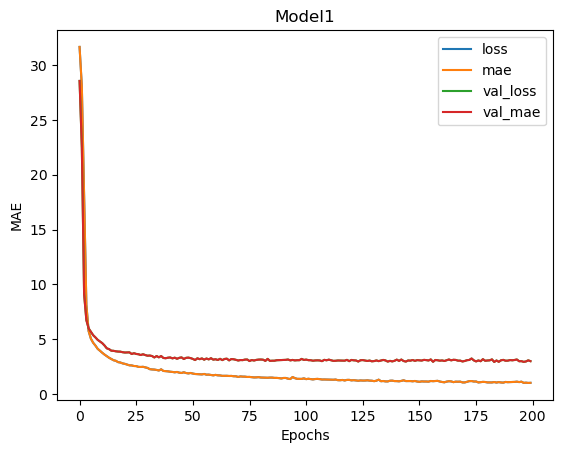

In [239]:
#Visualize loss curves 
pd.DataFrame(history_1.history).plot(title='Model1', xlabel='Epochs', ylabel='MAE');

In [240]:
# make some predictions
preds_1 = model_1.predict(X_test_ss)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


In [242]:
# Visualize preds vs true values
pd.DataFrame({'Y true': y_test, 'Y pred':tf.squeeze(preds_1)})

,Y true,Y pred
84,18,18.150103
1845,42,43.972172
1310,38,38.262978
1818,24,24.586975
1011,44,45.287586
...,...,...
705,42,32.191219
1927,30,30.473816
338,18,16.540398
176,24,23.481129
